# Moby Dick Text Analysis
What are the most commonly used words in the novel Moby Dick by Herman Mellville? 

Not only is it a great book, it's also an excellent choice for this analysis due to its length, varied vocabulary, and availability for free on Project Gutenberg. 

For this notebook, I'll scrape the contents of the novel from Project Gutenberg, extract all words using the Natural Language Toolkit, and clean the word list to properly analyze and solve our question. 

First, I'll load the libraries needed for the project:

In [55]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import urllib
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter

To get the text from Project Gutenberg, I'll use Requests and Beautiful Soup. This will scrape the html on the site and convert into text that I can use. 

In [56]:
url = 'http://www.gutenberg.org/files/2701/2701-0.txt'
r = requests.get(url)
soup = BeautifulSoup(r.text,'html5lib')
text = soup.get_text()

Now that I have a string of the full text of Moby Dick, I need to separate each word into an item in a list. This is how I'll eventually count each unique word. I'll use the Natural Language Toolkit Tokenize package to easily do this. 

In [59]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)

Next, each word needs to be changed to lowercase so we don't count capitalized words differently than lowercased words.

In [61]:
words = []

for i in tokens:
    words.append(i.lower())

I've also noticed that Project Gutenberg has added a long forward at the beginning of the file before the book starts. This will affect the proper count of the actual words used in Moby Dick. The forward will need to be removed, but first I need to find the position in the list where the book starts. 

Knowing that the first line of Moby Dick is: "Call Me Ishmael", we'll used the word 'ishmael' as a way to find the first word of the novel.

In [62]:
words.index('ishmael')

4936

In [63]:
words[4931]

'chapter'

Position 4931 is the first word of the book. I'll remove all text before this first chapter.

In [64]:
book_words = words[4931:]

Next I'll need to remove all the stop words from my list. These are common words that won't be interesting for the analysis.

I've downloaded a list of common stop words from github at this address: https://github.com/stopwords-iso/stopwords-en/blob/master/stopwords-en.txt. After reading in the file, the words will be split into their own list. I'll finally add a few extra words I noticed from the text that I want removed.

In [65]:
f = open('stopwords-en.txt','r')
stop_words = f.read()
stop_words = stop_words.split('\n')
more_s_words = ['ï','â','chapter']
stop_words = stop_words + more_s_words

Will my list of stop words, I'll create a final list of the words I'll be using to analyze the book.

In [66]:
md_words = []

for i in book_words:
    if i not in stop_words:
        md_words.append(i)

With this final list completed, I can count the occurance of each word of the book with the module Counter. This will output a Collections.counter object that I can treat as a dictionary and use to create a pandas dataframe.

In [69]:
md_counts = Counter(md_words)

In [70]:
md_df = pd.DataFrame.from_dict(md_counts, orient='index').reset_index()

In [71]:
md_df = md_df.rename(columns={'index':'word',0:'count'})

In [72]:
md_df = md_df.sort_values('count',ascending=False)

With my dataframe created and organized the amount a word was used, I can easily create a visualization to solve the question of the most common word in Moby Dick. 

<AxesSubplot:xlabel='word', ylabel='count'>

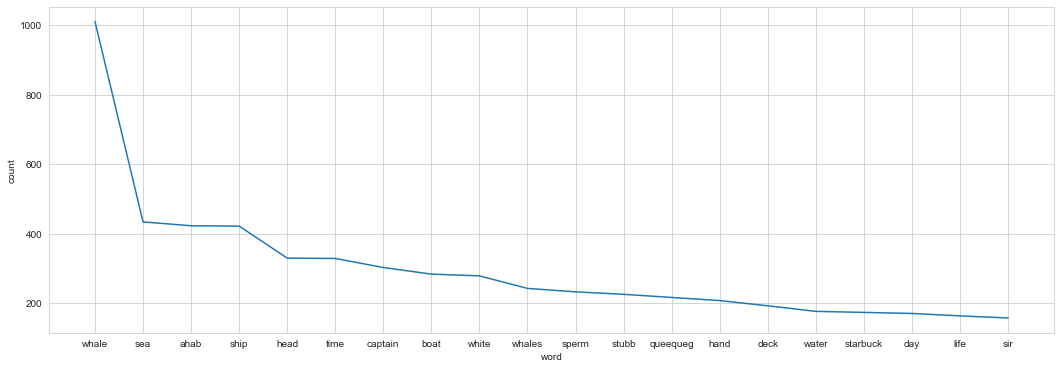

In [75]:
plt.figure(figsize=(18,6))

sns.lineplot(data=md_df.head(20),x='word',y='count')

With the visualization built from my dataframe, we can see that 'whale' is the most common word in Moby Dick by more than double any other word.